In [1]:
import os
import numpy as np
import itertools as it

from types import SimpleNamespace
from scipy.optimize import minimize

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as TB
import Modules.functions as func
import Modules.plot_functions as pf

In [2]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
p = SimpleNamespace(mu=1.83, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)

In [4]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'winding_line_cut_convergence_m8n15'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    mus = pickle.load(fp)
    kpar = pickle.load(fp)
    p = pickle.load(fp)

In [5]:
keys = list(d_dict.keys())
keys = [int(key) for key in keys]
keys.sort()
keys = [str(key) for key in keys]

In [6]:
keys

['10000',
 '20000',
 '30000',
 '40000',
 '50000',
 '70000',
 '100000',
 '150000',
 '200000',
 '300000',
 '500000']

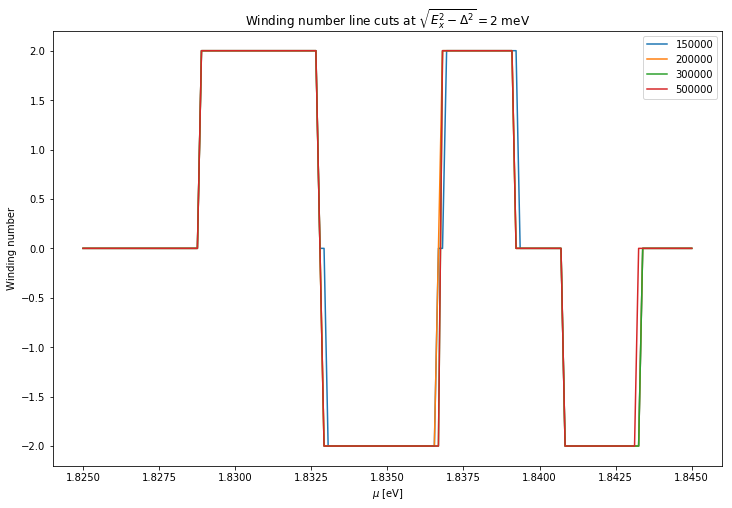

In [7]:
offs = 3*0
fig = plt.figure(figsize=(12, 8))
for i, key in enumerate(keys[-4:]):
    winding, kperps, kpar = d_dict[key]
    plt.plot(mus, np.array(winding) + i*offs, label=key)
    plt.legend()
plt.xlabel(r'$\mu$ [eV]')
plt.ylabel(r'Winding number')
plt.title(r'Winding number line cuts at $\sqrt{E_x^2 - \Delta^2} = 2$ meV')

In [30]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'winding_line_cut_convergence_m9n17'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    mus = pickle.load(fp)
    kpar = pickle.load(fp)
    p = pickle.load(fp)

In [31]:
keys = list(d_dict.keys())
keys = [int(key) for key in keys]
keys.sort()
keys = [str(key) for key in keys]

In [32]:
keys

['10000',
 '20000',
 '30000',
 '40000',
 '50000',
 '70000',
 '100000',
 '150000',
 '200000',
 '300000',
 '500000']

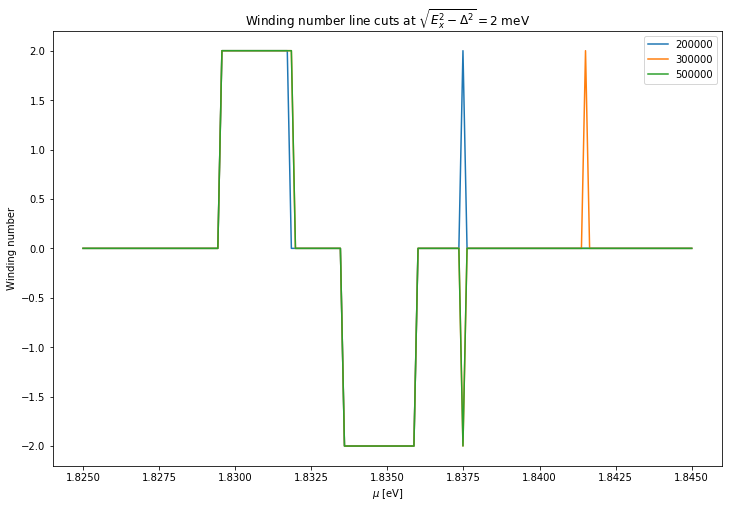

In [38]:
offs = 3*0
fig = plt.figure(figsize=(12, 8))
for i, key in enumerate(keys[-3:]):
    winding, kperps, kpar = d_dict[key]
    plt.plot(mus, np.array(winding) + i*offs, label=key)
    plt.legend()
plt.xlabel(r'$\mu$ [eV]')
plt.ylabel(r'Winding number')
plt.title(r'Winding number line cuts at $\sqrt{E_x^2 - \Delta^2} = 2$ meV')

In [39]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'winding_line_cut_convergence_m9n17_half_BZ'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    mus = pickle.load(fp)
    kpar = pickle.load(fp)
    p = pickle.load(fp)
keys = list(d_dict.keys())
keys = [int(key) for key in keys]
keys.sort()
keys = [str(key) for key in keys]

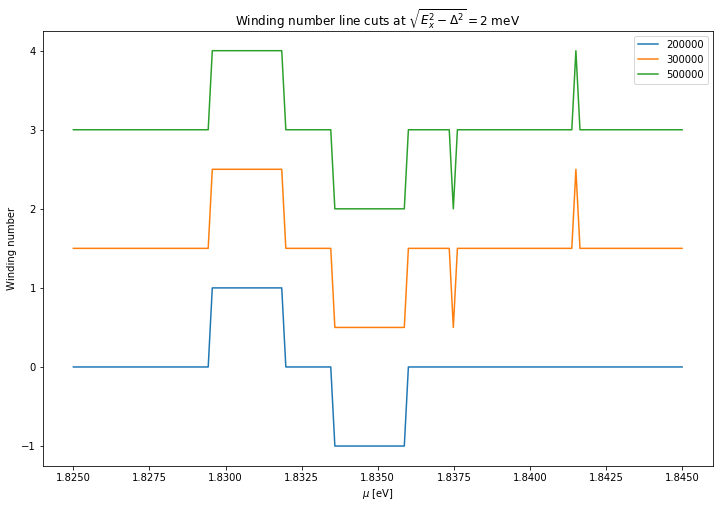

In [56]:
offs = 1.5
fig = plt.figure(figsize=(12, 8))
for i, key in enumerate(keys[-3:]):
    winding, kperps, kpar = d_dict[key]
    plt.plot(mus, np.array(winding) + i*offs, label=key)
    plt.legend()
plt.xlabel(r'$\mu$ [eV]')
plt.ylabel(r'Winding number')
plt.title(r'Winding number line cuts at $\sqrt{E_x^2 - \Delta^2} = 2$ meV')

In [50]:
def k_BZ_edges(mm, nn):
    """Lattice vector indices in the 11 band basis, T = mm*a_1 + nn*a_2. """
    # In Doru's basis
    m = mm - nn
    n = nn
    return 2*np.pi/np.sqrt(3.) * np.sqrt(m**2 + n**2 + m*n), np.pi/np.sqrt(m**2 + n**2 + m*n)

def tokxky(ks, mm, nn):
    kperp, kpar = ks
    # In Doru's basis
    m = mm - nn
    n = nn
    v = (m + n/2.)/np.sqrt(m**2 + n**2 + m*n)
    w = 0.5*n*np.sqrt(3.)/np.sqrt(m**2 + n**2 + m*n)
    return (v*kpar + w*kperp, w*kpar - v*kperp)

def angle_armchair(m, n):
    """Return the angle between the armchair edge and the edge T = ma_1 + na_2,
    where the 11 band basis is assumed for the indices m and n.
    
    Angle returned in degrees"""
    return np.arccos(np.sqrt(3)*n/(np.sqrt((2*m -n)**2 + 3*n**2)))*360/(2*np.pi)

In [51]:
angle_armchair(9, 17)

1.9451190845037838

## Check the symmetry in the spectrum between $k_\perp$ and $-k_\perp$

Even in $k_\perp$ (only checked $k_\parallel = 0$)

In [11]:
p = SimpleNamespace(mu=1.835, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
sqrt = 0.002
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

In [12]:
p

namespace(Delta=0.0008, Ex=0.0021540659228538013, Ey=0.0, lambda_M=0.0836, lambda_X=0.0556, mu=1.835)

In [84]:
# Approximate armchair cut in my basis
# mm = 9; nn = 17
mm = 1; nn = 0
p.mm = mm; p.nn = nn

kperp_edge, kpar_edge = func.k_BZ_edges(mm, nn)

kperps = np.linspace(-kperp_edge, kperp_edge, 2000)
kpar = 0.0

# ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]

In [86]:
kperp_edge

3.6275987284684357

In [87]:
kpar_edge

3.1415926535897931

In [93]:
def spectrum_difference(kperp, kpar, p, spin=True, SC=True):
    kx, ky = func.tokxky((kperp, kpar), p.mm, p.nn)
    E1 = H.energies(kx, ky, p, spin=spin, SC=SC)
    kx, ky = func.tokxky((-kperp, kpar), p.mm, p.nn)
    E2 = H.energies(kx, ky, p, spin=spin, SC=SC)
    return np.linalg.norm(E1 - E2)

In [94]:
p

namespace(Delta=0.0008, Ex=0.01, Ey=0.0, lambda_M=0.0836, lambda_X=0.0556, mm=1, mu=1.835, nn=0)

In [95]:
p.Ex = 0.01

In [96]:
# m = 9, n = 17
symm_in_kperp = [spectrum_difference(kperp, kpar, p) for kperp in kperps]

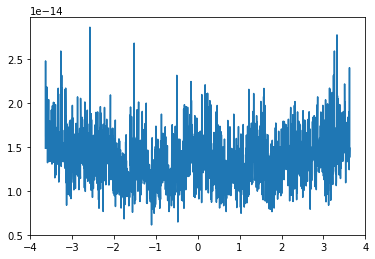

In [97]:
plt.plot(kperps, symm_in_kperp)

In [32]:
# m = 8, n = 15
symm_in_kperp = [spectrum_difference(kperp, kpar, p) for kperp in kperps]

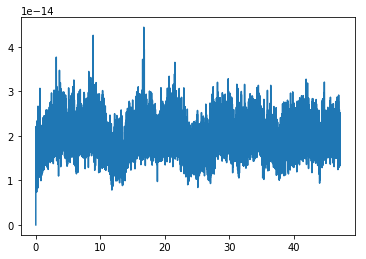

In [33]:
plt.plot(kperps, symm_in_kperp)

# Check the periodicity of the spectrum to make sure the BZ is properly defined

In [43]:
# Approximate armchair cut in my basis
mm = 8; nn = 15
p.mm = mm; p.nn = nn

kperp_edge, kpar_edge = k_BZ_edges(mm, nn)

kperps = np.linspace(-2*kperp_edge, 2*kperp_edge, 5000)
kpar = 0.0

ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]

In [44]:
disp = [H.energies(kx, ky, p, spin=True, SC=True) for (kx, ky) in ks]

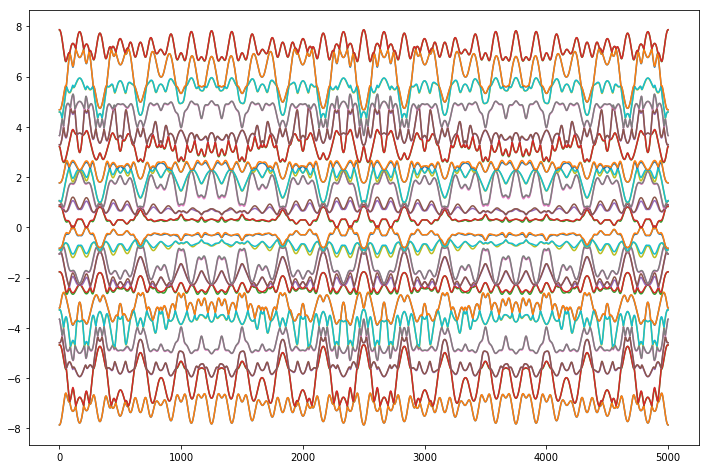

In [49]:
fig = plt.figure(figsize=(12, 8))
plt.plot(disp);
# plt.ylim(-1, 1)

## One of the difficult points

In [111]:
mu = 1.83748322148
p = SimpleNamespace(mu=mu, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
sqrt = 0.002
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

In [112]:
# Approximate armchair cut in my basis
mm = 9; nn = 17
p.mm = mm; p.nn = nn

kperp_edge, kpar_edge = k_BZ_edges(mm, nn)

kperps = np.linspace(0, kperp_edge, 20000)
kpar = 0.0

ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]

In [62]:
disp = [H.energies(kx, ky, p, spin=True, SC=True) for (kx, ky) in ks]

(3000, 3300)

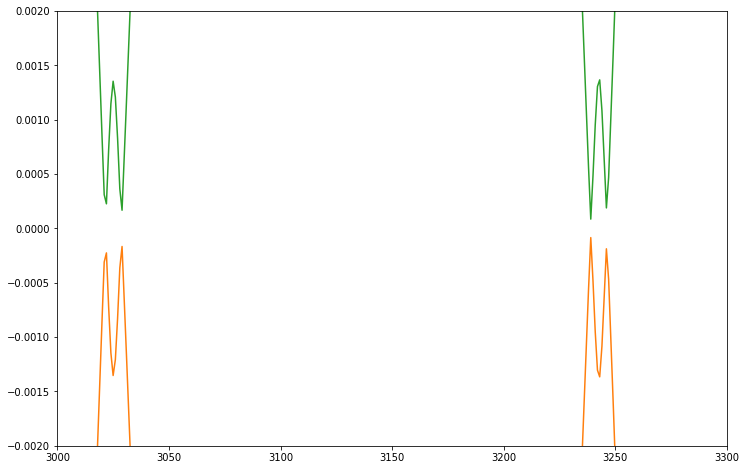

In [70]:
fig = plt.figure(figsize=(12, 8))
plt.plot(disp);
plt.ylim(-0.002, 0.002)
plt.xlim(3000, 3300)

In [113]:
# Approximate armchair cut in my basis
kperps = np.linspace(0, kperp_edge, 300000)
kpar = 0.0

ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]

In [114]:
# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]
phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

In [115]:
zs = [func.z(kx, ky, U, p)*phase for (kx, ky) in ks]
phis = np.angle(zs)

In [82]:
W = func.winding_number(ks, p, U, phase=phase)

In [83]:
# 300000 points in half BZ - should be -1
W

-1

In [122]:
zs_300k = zs

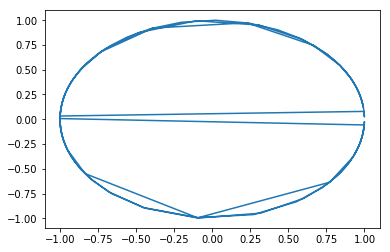

In [123]:
plt.plot(zs_300k.real, zs_300k.imag)

In [138]:
53/1000000

5.3e-05

In [137]:
plt.plot(np.roll(zs_300k.real, -1) - zs_300k.real)
plt.xlim(21325, 21330)

(21325, 21330)

In [130]:
plt.plot(np.roll(zs_300k.imag, -1) - zs_300k.imag)

In [128]:
zs_300k.real[100000] - zs_300k.real[100001]

2.4112933871833775e-12

In [124]:
plt.plot(zs_300k.real)
plt.plot(zs_300k.imag)

In [126]:
phis_300k = np.angle(zs_300k)
plt.plot(phis_300k)

In [127]:
func.branch_cuts(phis_300k)

-1

In [79]:
# A MILLION points in half BZ - it vanishes!
W

0

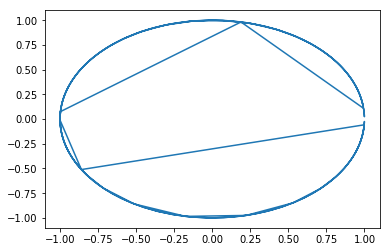

In [99]:
plt.plot(zs_mil.real, zs_mil.imag)

In [100]:
phis_mil = np.angle(zs_mil)

In [101]:
plt.plot(phis_mil)

In [102]:
func.branch_cuts(phis_mil)

0

# Line cuts for different edge cuts that are approximately armchair

In [113]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'winding_line_cut_mus_sqrt0002_edges_angles_half_BZ_adaptive'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    mus = pickle.load(fp)
    keys = pickle.load(fp)
    p = pickle.load(fp)
    N = pickle.load(fp)
    eps = pickle.load(fp)
    kpar = pickle.load(fp)
    half_BZ = pickle.load(fp)
    adaptive = pickle.load(fp)
    phase = pickle.load(fp)

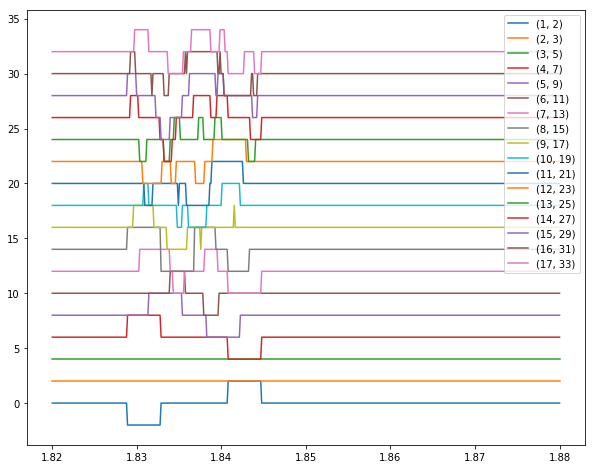

In [114]:
plt.figure(figsize=(10, 8))
for i, key in enumerate(keys):
    offs = 2
    plt.plot(mus, 2*np.array(d_dict[key])+i*offs, label=key)
    plt.legend()

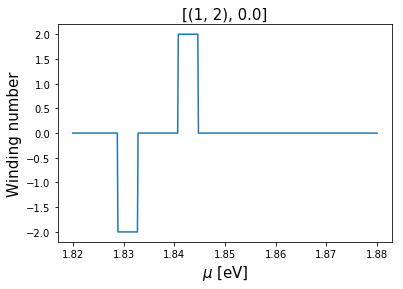

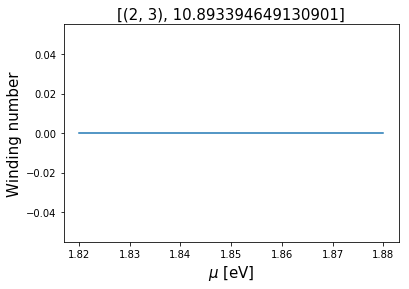

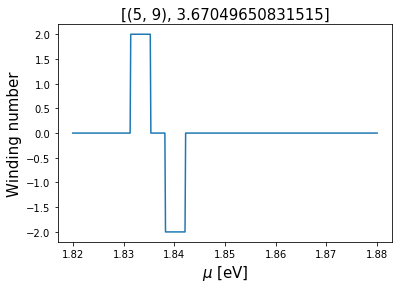

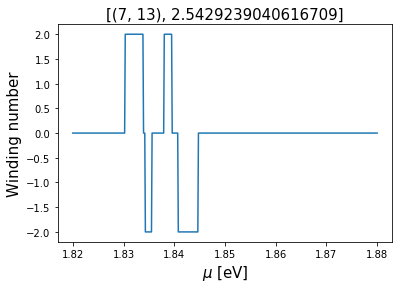

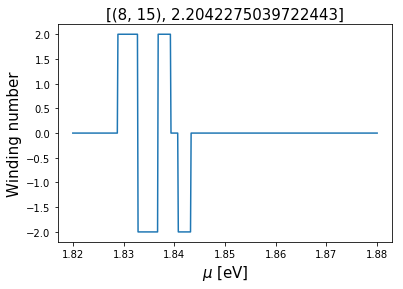

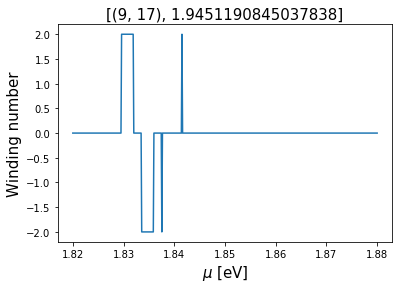

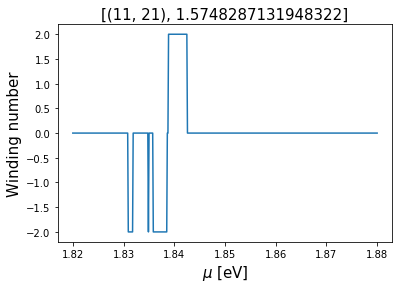

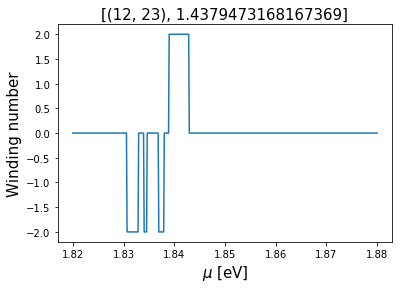

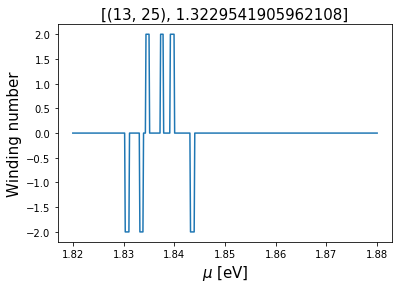

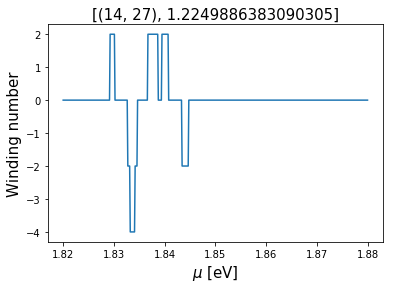

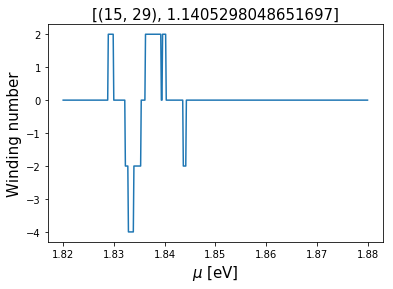

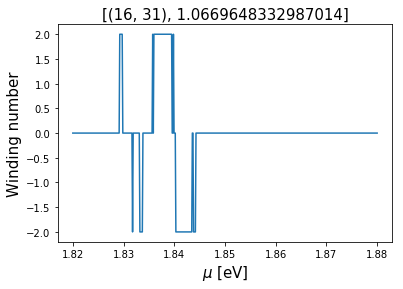

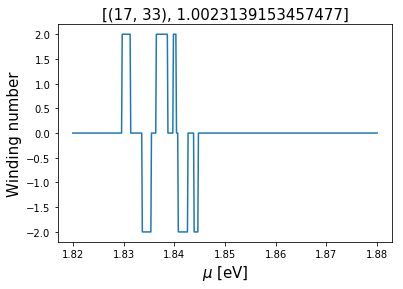

In [123]:
for key in keys:
    mm, nn = key
    angle = func.angle_armchair(mm, nn)
    fig = plt.figure()
    plt.plot(mus, 2*np.array(d_dict[key]))
    plt.xlabel(r'$\mu$ [eV]', size = 15)
    plt.ylabel('Winding number', size=15)
    plt.title([key, angle], size=15)

In [126]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'winding_line_cut_mus_sqrt00032_edges_angles_half_BZ_adaptive'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    mus = pickle.load(fp)
    keys = pickle.load(fp)
    p = pickle.load(fp)
    N = pickle.load(fp)
    eps = pickle.load(fp)
    kpar = pickle.load(fp)
    half_BZ = pickle.load(fp)
    adaptive = pickle.load(fp)
    phase = pickle.load(fp)

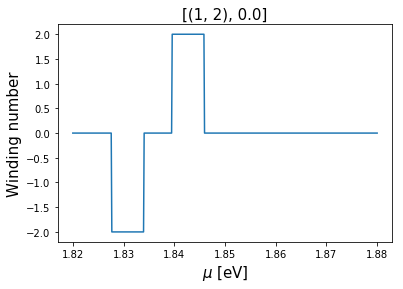

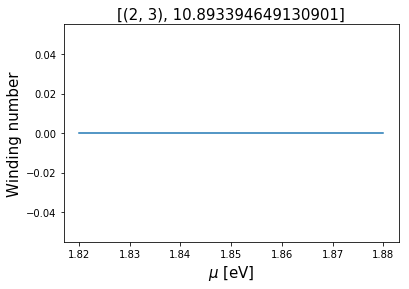

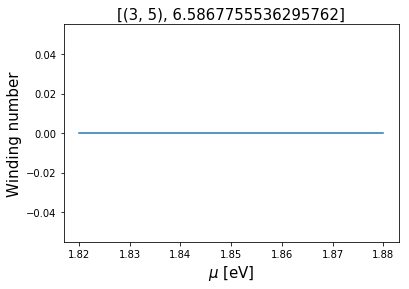

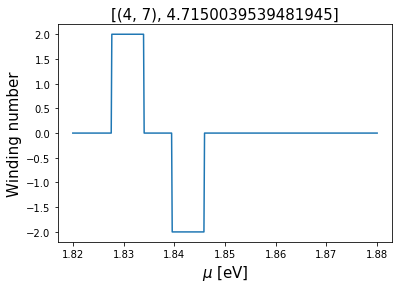

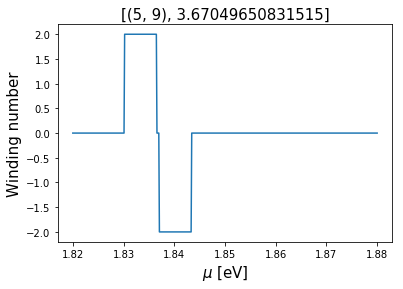

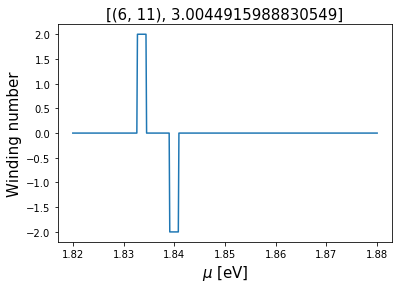

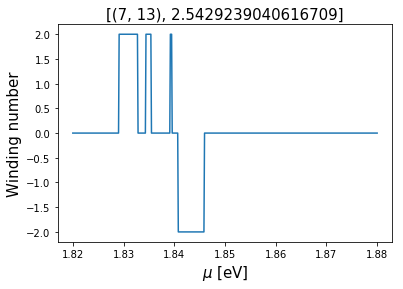

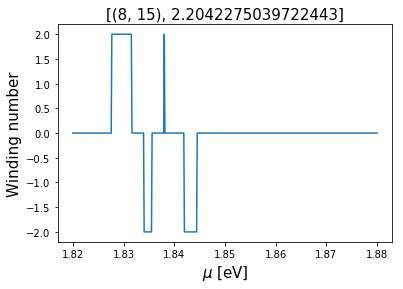

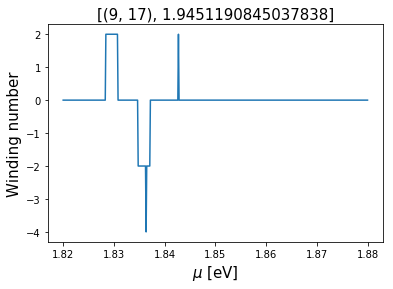

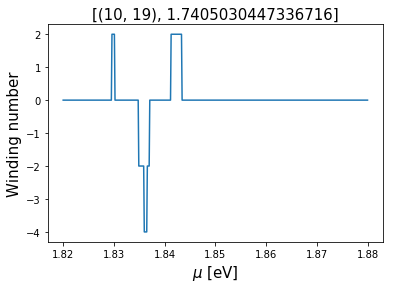

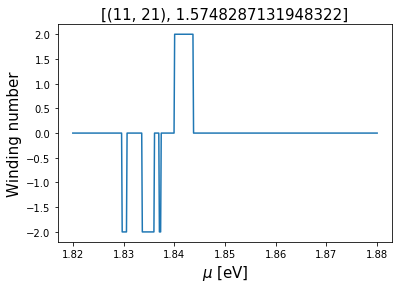

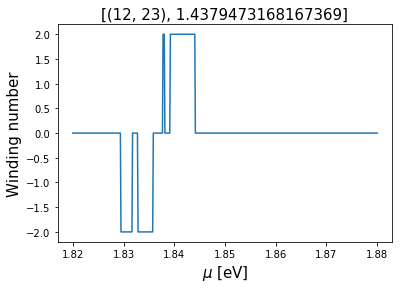

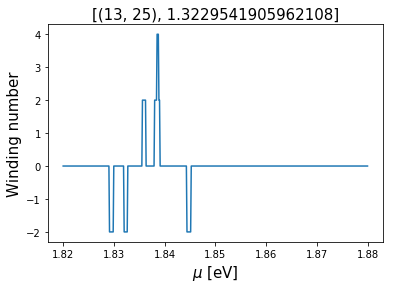

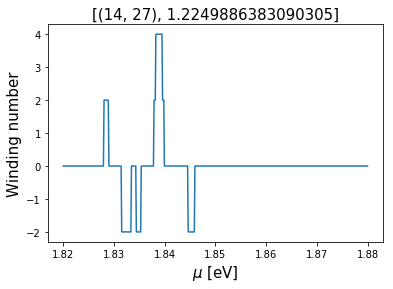

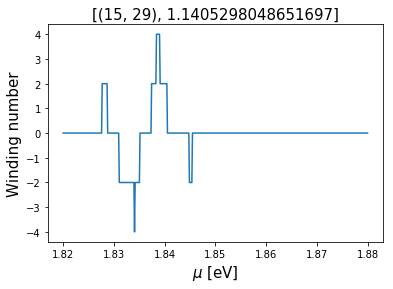

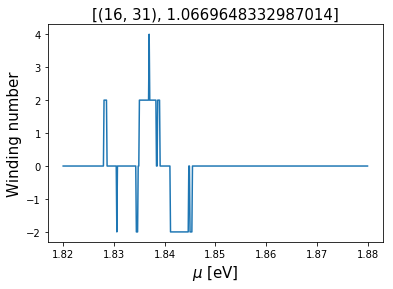

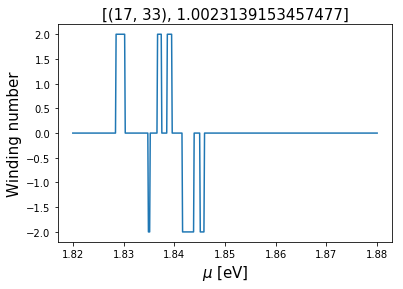

In [127]:
for key in keys:
    mm, nn = key
    angle = func.angle_armchair(mm, nn)
    fig = plt.figure()
    plt.plot(mus, 2*np.array(d_dict[key]))
    plt.xlabel(r'$\mu$ [eV]', size = 15)
    plt.ylabel('Winding number', size=15)
    plt.title([key, angle], size=15)

# Line cuts for for $(m,n) = (8, 15)$ for different $k_\parallel$

In [140]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'winding_line_cut_mus_sqrt00032_m8n15_kpars_adaptive'
with open(path + out_name + '.p', 'rb') as fp:
    d_dict = pickle.load(fp)
    mus = pickle.load(fp)
    keys = pickle.load(fp)
    kpars = pickle.load(fp)
    p = pickle.load(fp)
    N = pickle.load(fp)
    eps = pickle.load(fp)
    kpar = pickle.load(fp)
    half_BZ = pickle.load(fp)
    adaptive = pickle.load(fp)
    phase = pickle.load(fp)

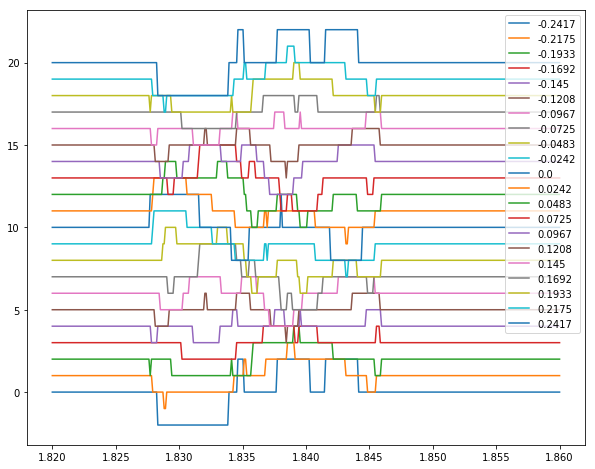

In [141]:
plt.figure(figsize=(10, 8))
for i, key in enumerate(keys):
    offs = 1
    plt.plot(mus, np.array(d_dict[key])+i*offs, label=key)
    plt.legend()

In [142]:
# Phase diagrams are symmetric between k_par and -k_par
for key in keys:
    assert np.allclose(np.array(d_dict[key]) - np.array(d_dict[-key]), 0)

/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


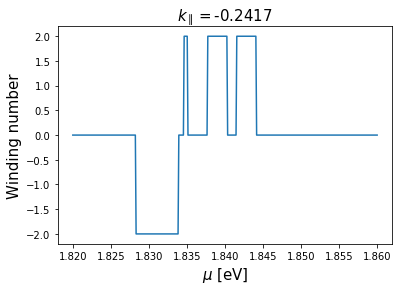

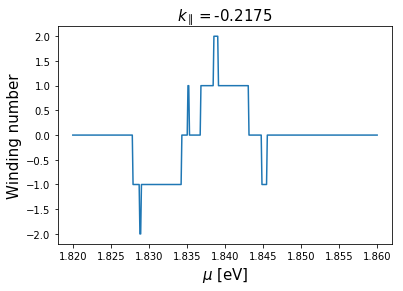

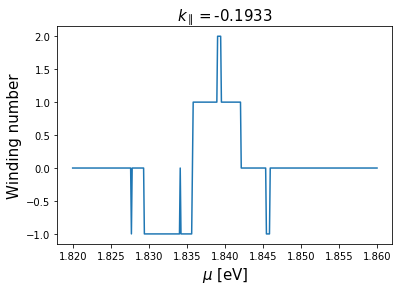

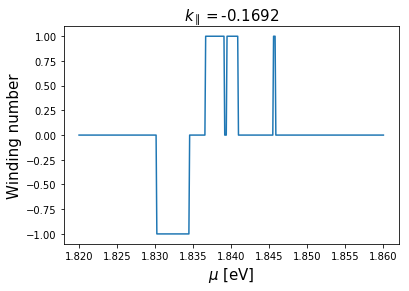

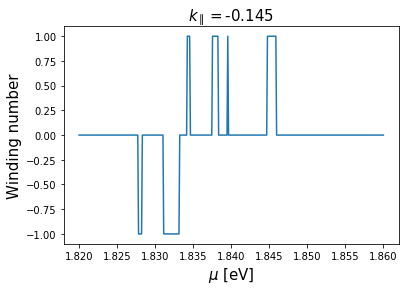

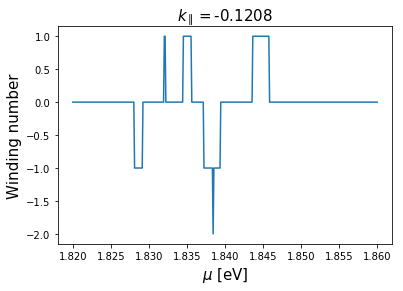

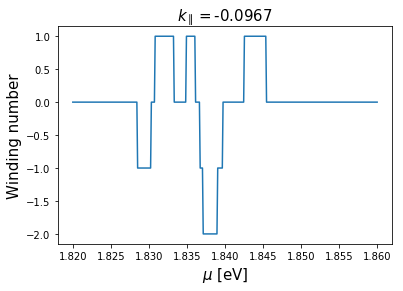

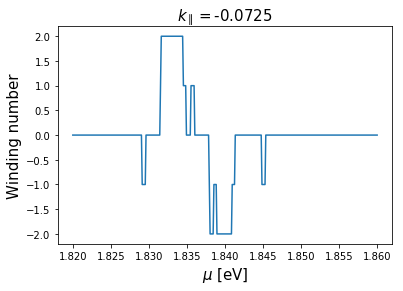

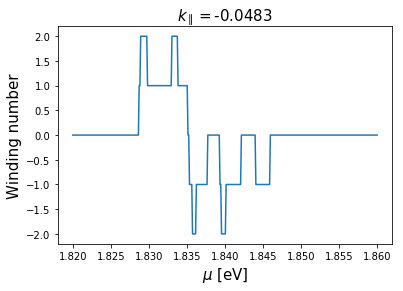

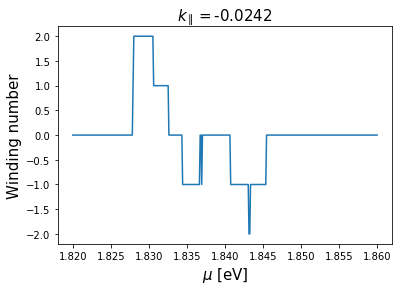

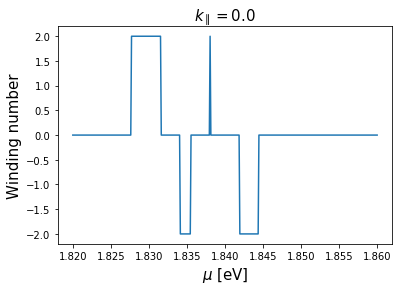

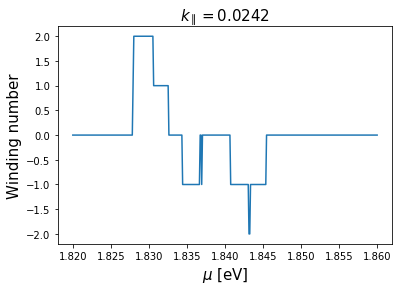

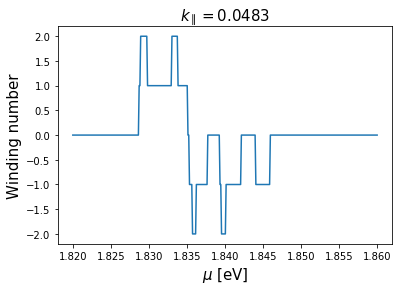

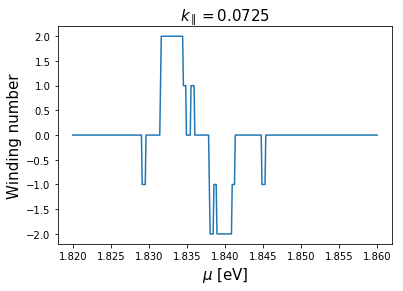

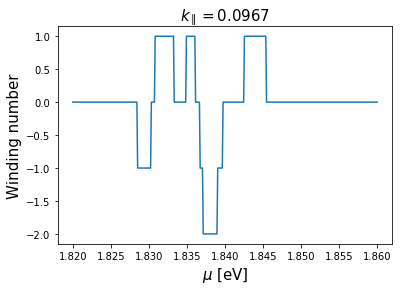

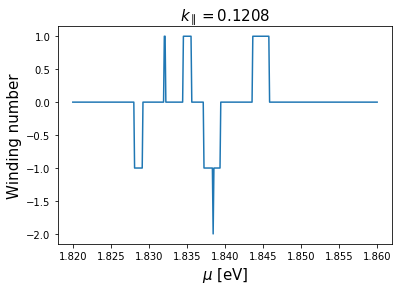

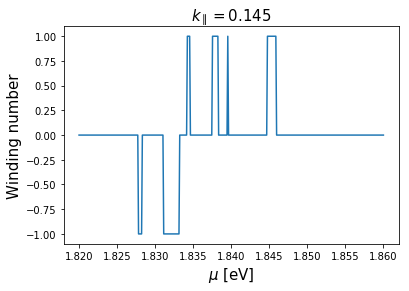

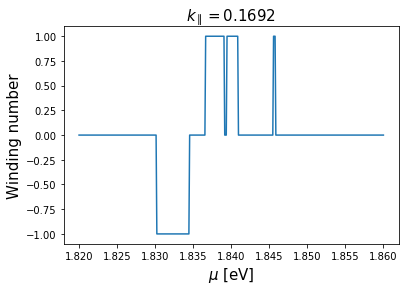

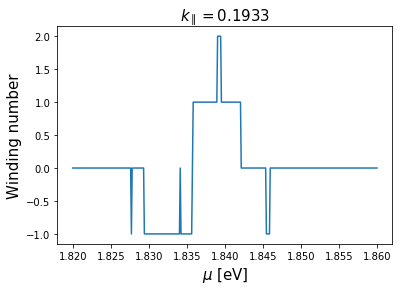

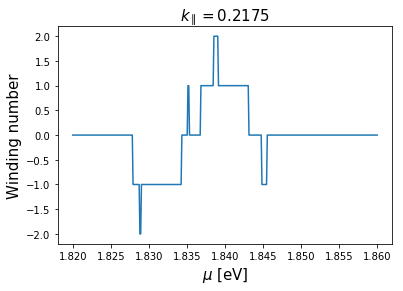

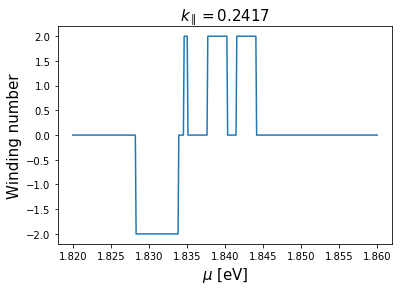

In [143]:
for key in keys:
    fig = plt.figure()
    plt.plot(mus, np.array(d_dict[key]))
    plt.xlabel(r'$\mu$ [eV]', size = 15)
    plt.ylabel('Winding number', size=15)
    plt.title(r'$k_\parallel = $' + str(key), size=15)